# auto_annot_Martin2019_with_Smillie2019_Type

In [1]:
import besca as bc
import pkg_resources

./conda/envs/besca_test/lib/python3.6/site-packages/scanpy/api/__init__.py:6: FutureWarning: 

In a future version of Scanpy, `scanpy.api` will be removed.
Simply use `import scanpy as sc` and `import scanpy.external as sce` instead.

  FutureWarning,


### Specify folders where .h5ad files are found and their names. 

The datasets that are already annotated and should be used for training. If you only use one dataset please use list of one.

In [2]:
# the path to the datasets
train_dataset_paths = [pkg_resources.resource_filename('besca', 'datasets/data')]
#the names of the h5ad files
train_datasets = ['Smillie2019_processed.h5ad']

The dataset of interest that should be annotated.

In [3]:
test_dataset = 'Martin2019_processed.h5ad'
test_dataset_path =  pkg_resources.resource_filename('besca', 'datasets/data')

Give your analysis a name.

In [4]:
analysis_name = 'auto_annot_Martin2019_with_Smillie2019_Type' 

### Now specify parameters

Specify column name of celltype annotation you want to train on.

In [5]:
celltype ='Type' 

Choose a method:

- linear: Support Vector Machine with Linear Kernel
- sgd: Support Vector Machine with Linear Kernel using Stochastic Gradient Descent
- rbf: Support Vector Machine with radial basis function kernel. Very time intensive, use only on small datasets.
- logistic_regression: Standard logistic classifier iwth multinomial loss.
- logistic_regression_ovr: Logistic Regression with one versus rest classification.
- logistic_regression_elastic: Logistic Regression with elastic loss, cross validates among multiple l1 ratios.

In [6]:
method = 'logistic_regression'

Specify merge method if using multiple training datasets. Needs to be either scanorama or naive.

In [7]:
merge = 'scanorama'

Decide if you want to use the raw format or highly variable genes. Raw increases computational time and does not necessarily improve predictions.

In [8]:
use_raw = False

You can choose to only consider a subset of genes from a signature set.

In [9]:
genes_to_use = 'all'

### Read in all training and the testing set.

In [10]:
adata_trains, adata_pred, adata_orig = bc.tl.auto_annot.read_data(train_paths = train_dataset_paths,train_datasets= train_datasets, test_path=  test_dataset_path, test_dataset= test_dataset, use_raw = use_raw)

Transforming to str index.


Reading files


Transforming to str index.


In [11]:
adata_trains[0].obs

CELL                 Cluster        Health  \
0          N7.EpiA.AAGCAAGAGTCAAC-Epi              Cycling TA  Non-inflamed   
1          N7.EpiA.ACGAGGGAGCTGAT-Epi  Enterocyte Progenitors  Non-inflamed   
2          N7.EpiA.ACGTTTACTGGTAC-Epi  Immature Enterocytes 2  Non-inflamed   
3          N7.EpiA.AGAGAATGGTCATG-Epi  Enterocyte Progenitors  Non-inflamed   
4          N7.EpiA.AGAGCGGAGTATGC-Epi                    TA 1  Non-inflamed   
5          N7.EpiA.AGATTAACGCCATA-Epi              Cycling TA  Non-inflamed   
6          N7.EpiA.AGGATGCTTACAGC-Epi                    TA 2  Non-inflamed   
7          N7.EpiA.AGGTACACAGACTC-Epi              Cycling TA  Non-inflamed   
8          N7.EpiA.AGTCTACTTCTCTA-Epi                    TA 2  Non-inflamed   
9          N7.EpiA.ATAGTCCTTAACCG-Epi                    TA 2  Non-inflamed   
10         N7.EpiA.ATATACGAAGTACC-Epi                    TA 2  Non-inflamed   
11         N7.EpiA.ATTCCAACTTTGGG-Epi                    TA 2  Non-inflamed   
12         N7.EpiA.ATTCGACTGCATAC-Epi              Cycling TA  Non-inflamed   
13         N7.EpiA.ATTGAAACCTATGG-Epi                    TA 1  Non-inflamed   
14         N7.EpiA.CAAGCCCTTGACAC-Epi                    TA 2  Non-inflamed   
15         N7.EpiA.CACGATGAGCTAAC-Epi              Cycling TA  Non-inflamed   
16         N7.EpiA.CAGACATGTTTGTC-Epi              Cycling TA  Non-inflamed   
17         N7.EpiA.CAGGAACTCGTTAG-Epi            Secretory TA  Non-inflamed   
18         N7.EpiA.CCACGGGAGTTACG-Epi                    TA 2  Non-inflamed   
19         N7.EpiA.CGAGGAGACGAGTT-Epi                    TA 2  Non-inflamed   
20         N7.EpiA.CGCTAAGATAGCGT-Epi         Immature Goblet  Non-inflamed   
21         N7.EpiA.CGGACTCTTGCCTC-Epi                    TA 2  Non-inflamed   
22         N7.EpiA.CGTCCATGGGTTCA-Epi                    TA 2  Non-inflamed   
23         N7.EpiA.CTGATGGACCCTCA-Epi            Secretory TA  Non-inflamed   
24         N7.EpiA.CTTAAGCTTACGAC-Epi              Cycling TA  Non-inflamed   
25         N7.EpiA.GAGCTCCTACCACA-Epi                    TA 2  Non-inflamed   
26         N7.EpiA.GAGCTCCTGCCTTC-Epi              Cycling TA  Non-inflamed   
27         N7.EpiA.GATGCAACACGCAT-Epi                    TA 2  Non-inflamed   
28         N7.EpiA.GCGAGAGATCGTTT-Epi              Cycling TA  Non-inflamed   
29         N7.EpiA.GGAACTTGTGGCAT-Epi             Enterocytes  Non-inflamed   
...                               ...                     ...           ...   
149702  N110.LPB.TTGAACGGTGCAACGA-Imm                  Plasma      Inflamed   
149703  N110.LPB.TTGAACGTCACGCATA-Imm                  Plasma      Inflamed   
149704  N110.LPB.TTGAACGTCCACTGGG-Imm                  Plasma      Inflamed   
149705  N110.LPB.TTGAACGTCGTACGGC-Imm                 CD8+ LP      Inflamed   
149706  N110.LPB.TTGACTTCATCCTAGA-Imm                  Plasma      Inflamed   
149707  N110.LPB.TTGACTTTCGTACGGC-Imm                  Plasma      Inflamed   
149708  N110.LPB.TTGCCGTAGAGCAATT-Imm   CD4+ Activated Fos-lo      Inflamed   
149709  N110.LPB.TTGCCGTAGTCAAGCG-Imm                  Plasma      Inflamed   
149710  N110.LPB.TTGCCGTGTCAGATAA-Imm                  Plasma      Inflamed   
149711  N110.LPB.TTGCCGTGTGTGTGCC-Imm                  Plasma      Inflamed   
149712  N110.LPB.TTGCCGTTCAAAGACA-Imm                  Plasma      Inflamed   
149713  N110.LPB.TTGCGTCAGCTCCTTC-Imm              Follicular      Inflamed   
149714  N110.LPB.TTGGAACCATGCCTTC-Imm                  Plasma      Inflamed   
149715  N110.LPB.TTGGAACTCTCTGTCG-Imm                  Plasma      Inflamed   
149716  N110.LPB.TTGTAGGTCCTTGACC-Imm                  Plasma      Inflamed   
149717  N110.LPB.TTTACTGAGAACAACT-Imm                  Plasma      Inflamed   
149718  N110.LPB.TTTACTGTCTACGAGT-Imm                  Plasma      Inflamed   
149719  N110.LPB.TTTATGCAGACGCACA-Imm                  Plasma      Inflamed   
149720  N110.LPB.TTTATGCAGTACTTGC-Imm       Cycling Monocytes      Inflamed   
1497

In [12]:
adata_pred.obs

CELL  \
index                                                                  
GSM3972009_69.AAACATACACACCA-1        GSM3972009_69.AAACATACACACCA-1   
GSM3972009_69.AAACATTGGTGTCA-1        GSM3972009_69.AAACATTGGTGTCA-1   
GSM3972009_69.AAACGCACTTAGGC-1        GSM3972009_69.AAACGCACTTAGGC-1   
GSM3972009_69.AAACGCTGCTACCC-1        GSM3972009_69.AAACGCTGCTACCC-1   
GSM3972009_69.AAACTTGAGTCACA-1        GSM3972009_69.AAACTTGAGTCACA-1   
GSM3972009_69.AAACTTGATCACCC-1        GSM3972009_69.AAACTTGATCACCC-1   
GSM3972009_69.AAAGACGAATCACG-1        GSM3972009_69.AAAGACGAATCACG-1   
GSM3972009_69.AAAGACGAATGCTG-1        GSM3972009_69.AAAGACGAATGCTG-1   
GSM3972009_69.AAAGATCTGTATCG-1        GSM3972009_69.AAAGATCTGTATCG-1   
GSM3972009_69.AAAGATCTTATCGG-1        GSM3972009_69.AAAGATCTTATCGG-1   
GSM3972009_69.AAAGCAGAGGTTCA-1        GSM3972009_69.AAAGCAGAGGTTCA-1   
GSM3972009_69.AAAGCAGATTGGCA-1        GSM3972009_69.AAAGCAGATTGGCA-1   
GSM3972009_69.AAAGCAGATTTCGT-1        GSM3972009_69.AAAGCAGATTTCGT-1   
GSM3972009_69.AAAGCCTGACTGTG-1        GSM3972009_69.AAAGCCTGACTGTG-1   
GSM3972009_69.AAAGCCTGAGCCTA-1        GSM3972009_69.AAAGCCTGAGCCTA-1   
GSM3972009_69.AAAGTTTGTCTAGG-1        GSM3972009_69.AAAGTTTGTCTAGG-1   
GSM3972009_69.AAATCAACTTCTTG-1        GSM3972009_69.AAATCAACTTCTTG-1   
GSM3972009_69.AAATCATGAATGCC-1        GSM3972009_69.AAATCATGAATGCC-1   
GSM3972009_69.AAATCCCTGTCGTA-1        GSM3972009_69.AAATCCCTGTCGTA-1   
GSM3972009_69.AAATCTGAGCTAAC-1        GSM3972009_69.AAATCTGAGCTAAC-1   
GSM3972009_69.AAATGGGAGGACAG-1        GSM3972009_69.AAATGGGAGGACAG-1   
GSM3972009_69.AAATGTTGGTGCTA-1        GSM3972009_69.AAATGTTGGTGCTA-1   
GSM3972009_69.AAATTCGACAACCA-1        GSM3972009_69.AAATTCGACAACCA-1   
GSM3972009_69.AACAAACTGGTCAT-1        GSM3972009_69.AACAAACTGGTCAT-1   
GSM3972009_69.AACACGTGAAGATG-1        GSM3972009_69.AACACGTGAAGATG-1   
GSM3972009_69.AACACGTGTCGCTC-1        GSM3972009_69.AACACGTGTCGCTC-1   
GSM3972009_69.AACACTCTAGCAAA-1        GSM3972009_69.AACACTCTAGCAAA-1   
GSM3972009_69.AACAGAGAATTTCC-1        GSM3972009_69.AACAGAGAATTTCC-1   
GSM3972009_69.AACAGCACTCAGGT-1        GSM3972009_69.AACAGCACTCAGGT-1   
GSM3972009_69.AACAGCACTGCACA-1        GSM3972009_69.AACAGCACTGCACA-1   
...                                                              ...   
GSM3972030_209.TTTATGCCATTTGCCC-1  GSM3972030_209.TTTATGCCATTTGCCC-1   
GSM3972030_209.TTTATGCGTGCATCTA-1  GSM3972030_209.TTTATGCGTGCATCTA-1   
GSM3972030_209.TTTCCTCAGGGCACTA-1  GSM3972030_209.TTTCCTCAGGGCACTA-1   
GSM3972030_209.TTTCCTCAGTGGCACA-1  GSM3972030_209.TTTCCTCAGTGGCACA-1   
GSM3972030_209.TTTCCTCCAGCTCGCA-1  GSM3972030_209.TTTCCTCCAGCTCGCA-1   
GSM3972030_209.TTTCCTCCATTCACTT-1  GSM3972030_209.TTTCCTCCATTCACTT-1   
GSM3972030_209.TTTCCTCGTAGATTAG-1  GSM3972030_209.TTTCCTCGTAGATTAG-1   
GSM3972030_209.TTTCCTCGTCGCGGTT-1  GSM3972030_209.TTTCCTCGTCGCGGTT-1   
GSM3972030_209.TTTCCTCTCCTTCAAT-1  GSM3972030_209.TTTCCTCTCCTTCAAT-1   
GSM3972030_209.TTTCCTCTCGAACTGT-1  GSM3972030_209.TTTCCTCTCGAACTGT-1   
GSM3972030_209.TTTGCGCAGACGCACA-1  GSM3972030_209.TTTGCGCAGACGCACA-1   
GSM3972030_209.TTTGCGCAGGTAGCCA-1  GSM3972030_209.TTTGCGCAGGTAGCCA-1   
GSM3972030_209.TTTGCGCCAAGTAATG-1  GSM3972030_209.TTTGCGCCAAGTAATG-1   
GSM3972030_209.TTTGCGCCACGGACAA-1  GSM3972030_209.TTTGCGCCACGGACAA-1   
GSM3972030_209.TTTGCGCGTCAGAATA-1  GSM3972030_209.TTTGCGCGTCAGAATA-1   
GSM3972030_209.TTTGCGCTCAGTCCCT-1  GSM3972030_209.TTTGCGCTCAGTCCCT-1   
GSM3972030_209.TTTGCGCTCCAGTAGT-1  GSM3972030_209.TTTGCGCTCCAGTAGT-1   
GSM3972030_209.TTTGGTTCAAAGCGGT-1  GSM3972030_209.TTTGGTTCAAAGCGGT-1   
GSM3972030_209.TTTGGTTCAATGTTGC-1  GSM3972030_209.TTTGGTTCAATGTTGC-1   
GSM3972030_209.TTTGGTTCATTCCTGC-1  GSM3972030_209.TTTGGTTCATTCCTGC-1   
GSM3972030_209.TTTGGTTGTGTAATGA-1  GSM3972030_209.TTTGGTTGTGTAATGA-1   
GSM3972030_209.TTTGGTTTCAAACGGG-1  GSM3972030_209.TTTGGTTTCAAACGGG-1   
GSM3972030_209.TTTGGTTTCCTGCAGG-1  GSM3972030_209.TTTGGTTTCCTGCAGG-1   
GSM3972030_209.TTTGTCAAGCATCATC-

This function merges training datasets, removes unwanted genes, and if scanorama is used corrects for datasets.

In [13]:
adata_train, adata_pred = bc.tl.auto_annot.merge_data(adata_trains, adata_pred, genes_to_use = genes_to_use, merge = merge)

merging with scanorama
using scanorama rn
Found 1054 genes among all datasets
[[0.         0.55768303]
 [0.         0.        ]]
Processing datasets (0, 1)
integrating training set
calculating intersection


### Train the classifier.

The returned scaler is fitted on the training dataset (to zero mean and scaled to unit variance).

In [14]:
classifier, scaler = bc.tl.auto_annot.fit(adata_train, method, celltype)

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed: 11.9min finished
./conda/envs/besca_test/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



### Prediction

Use fitted model to predict celltypes in adata_pred. Prediction will be added in a new column called 'auto_annot'. Paths are needed as adata_pred will revert to its original state (all genes, no additional corrections).
The threshold should be set to 0 or left out for SVM. For logisitic regression the threshold can be set.

In [15]:
adata_predicted = bc.tl.auto_annot.adata_predict(classifier = classifier, scaler = scaler, adata_pred = adata_pred, adata_orig = adata_orig, threshold = 0.1)

Write out metrics to a report file, create confusion matrices and comparative umap plots

./conda/envs/besca_test/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

./conda/envs/besca_test/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

... storing 'auto_annot' as categorical


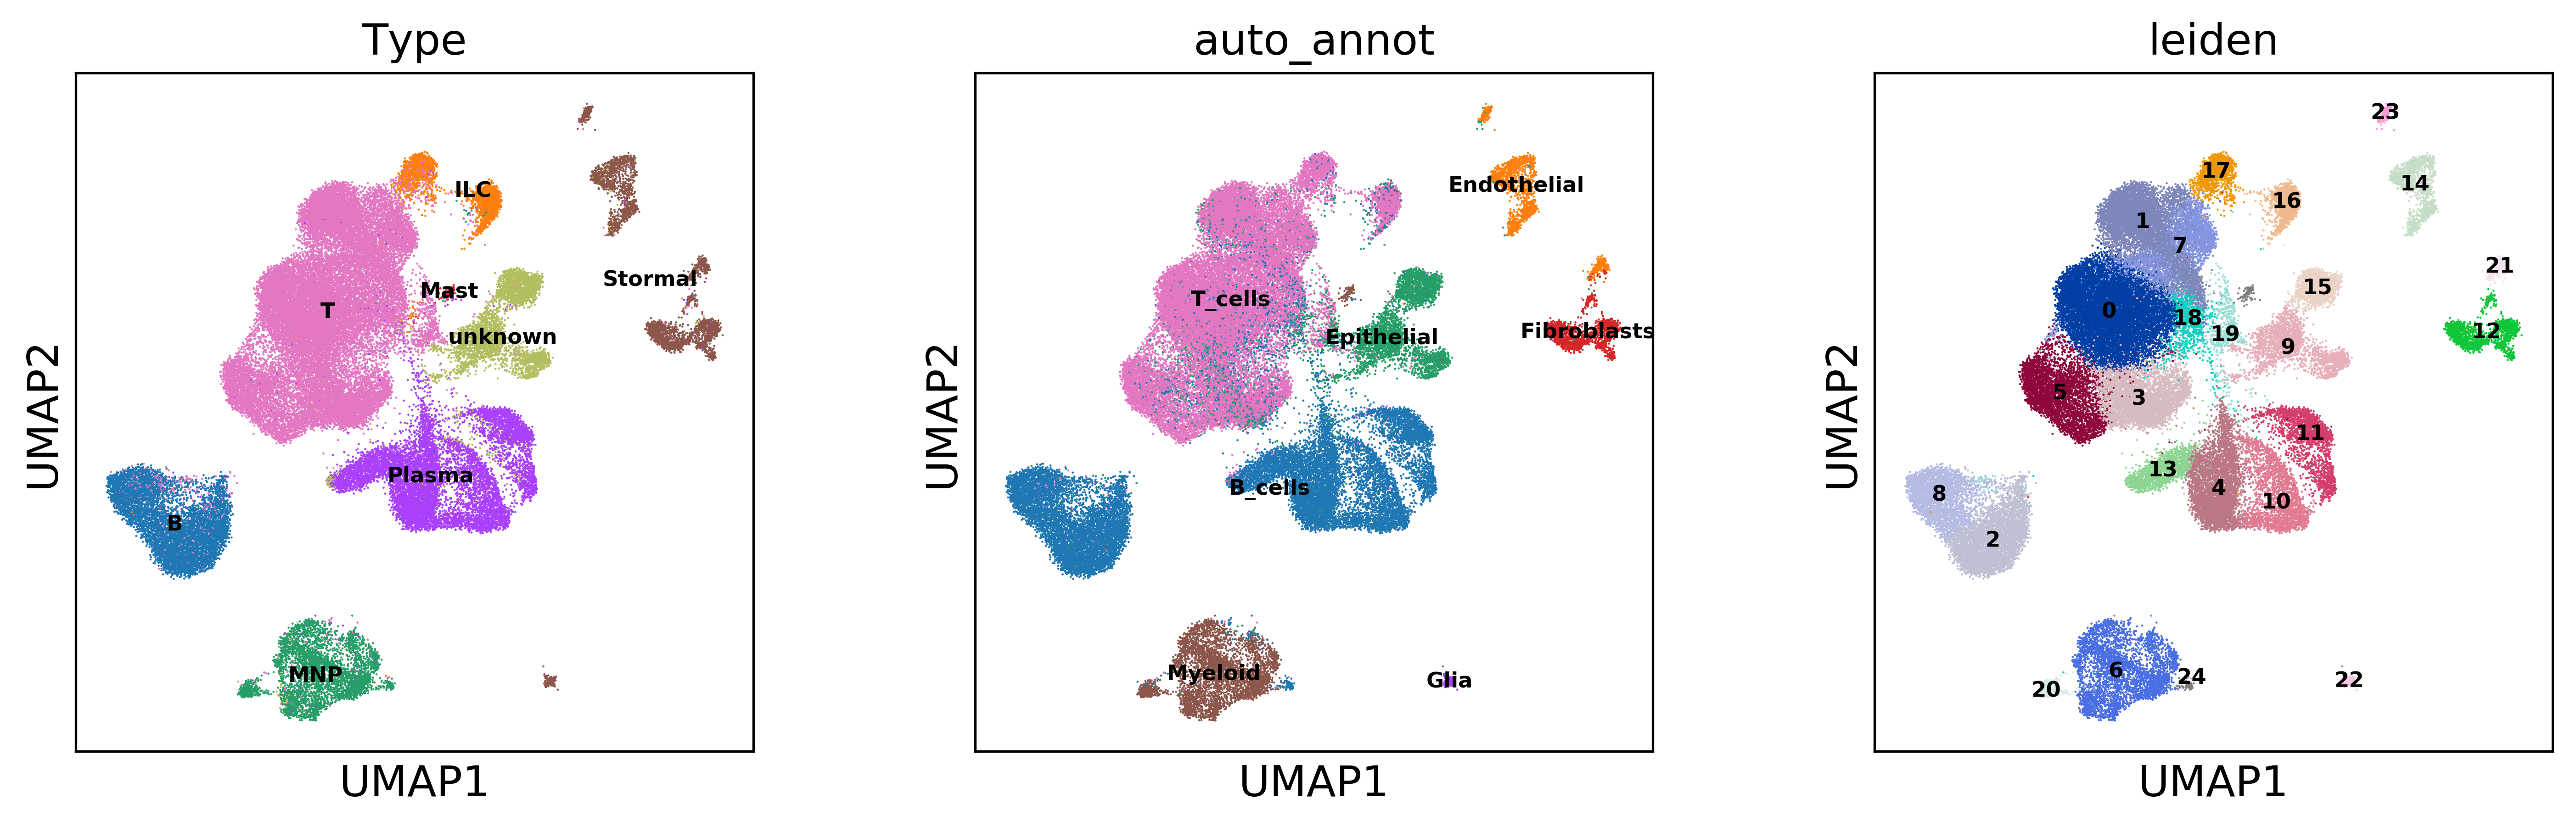

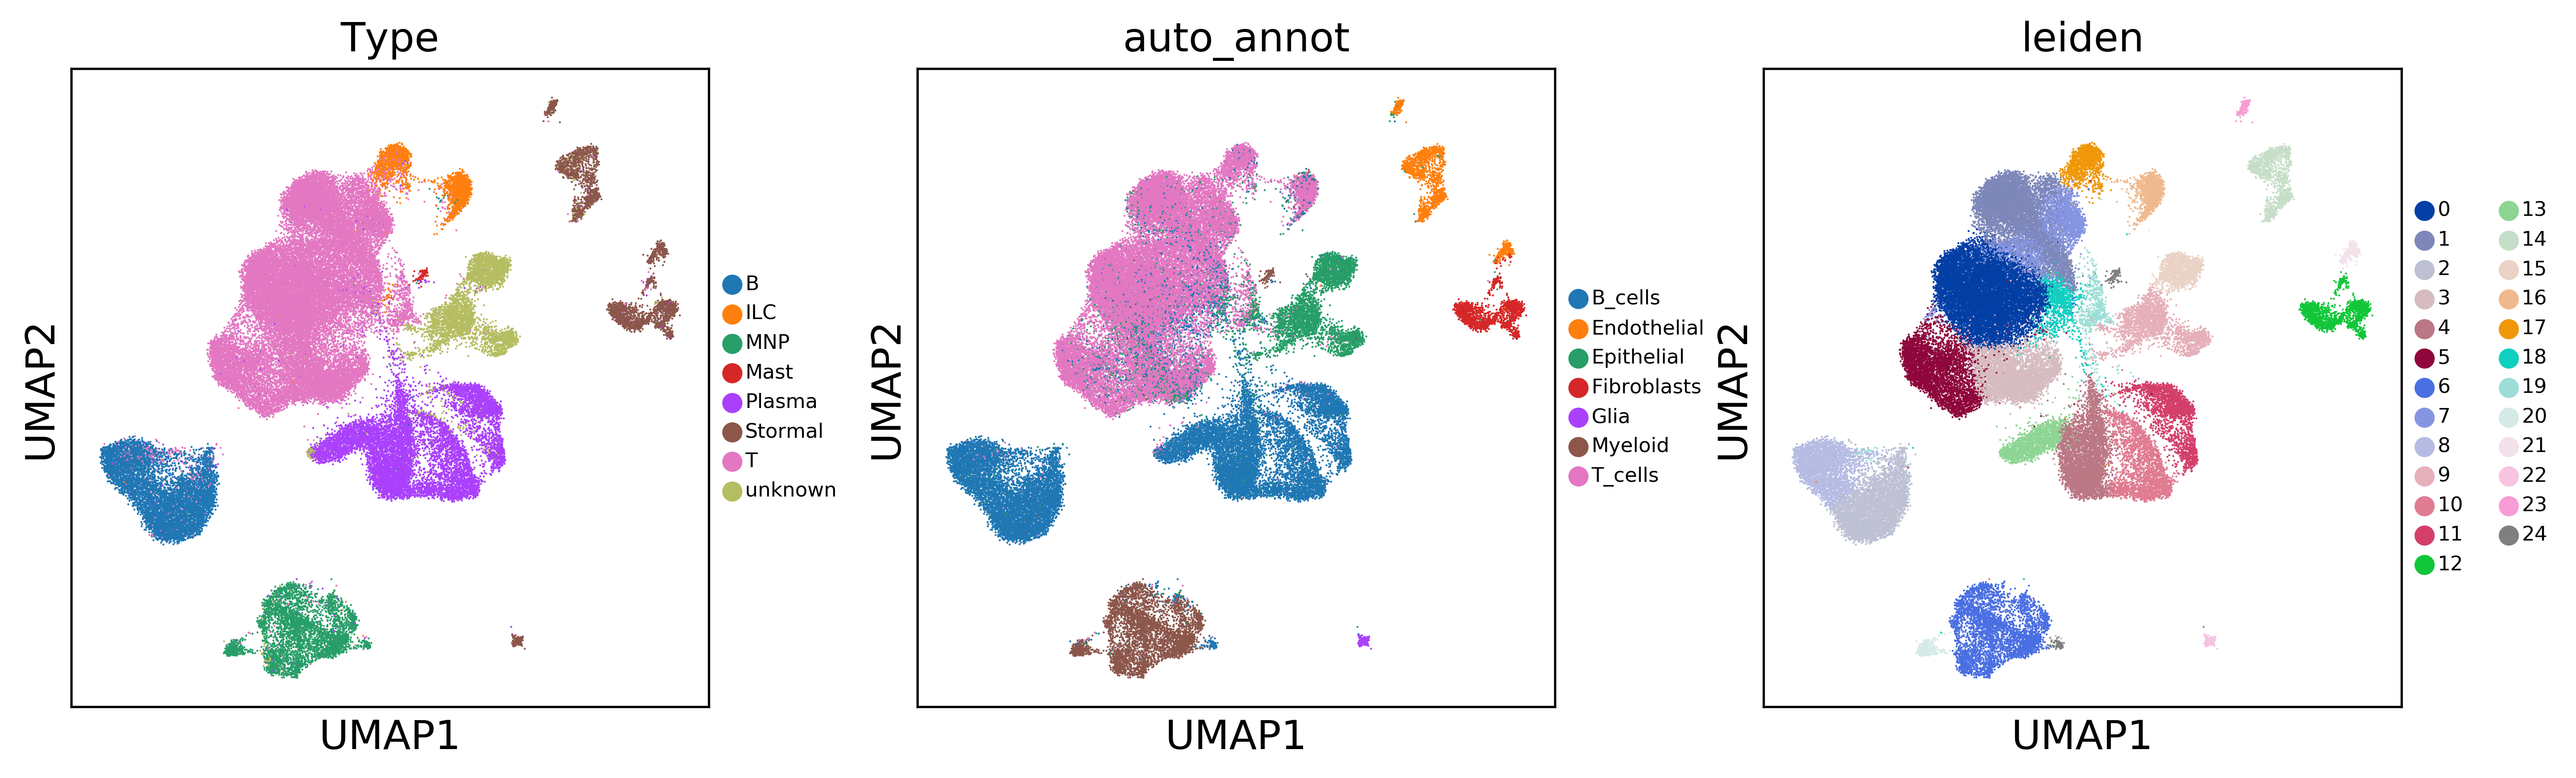

Confusion matrix, without normalization
Normalized confusion matrix


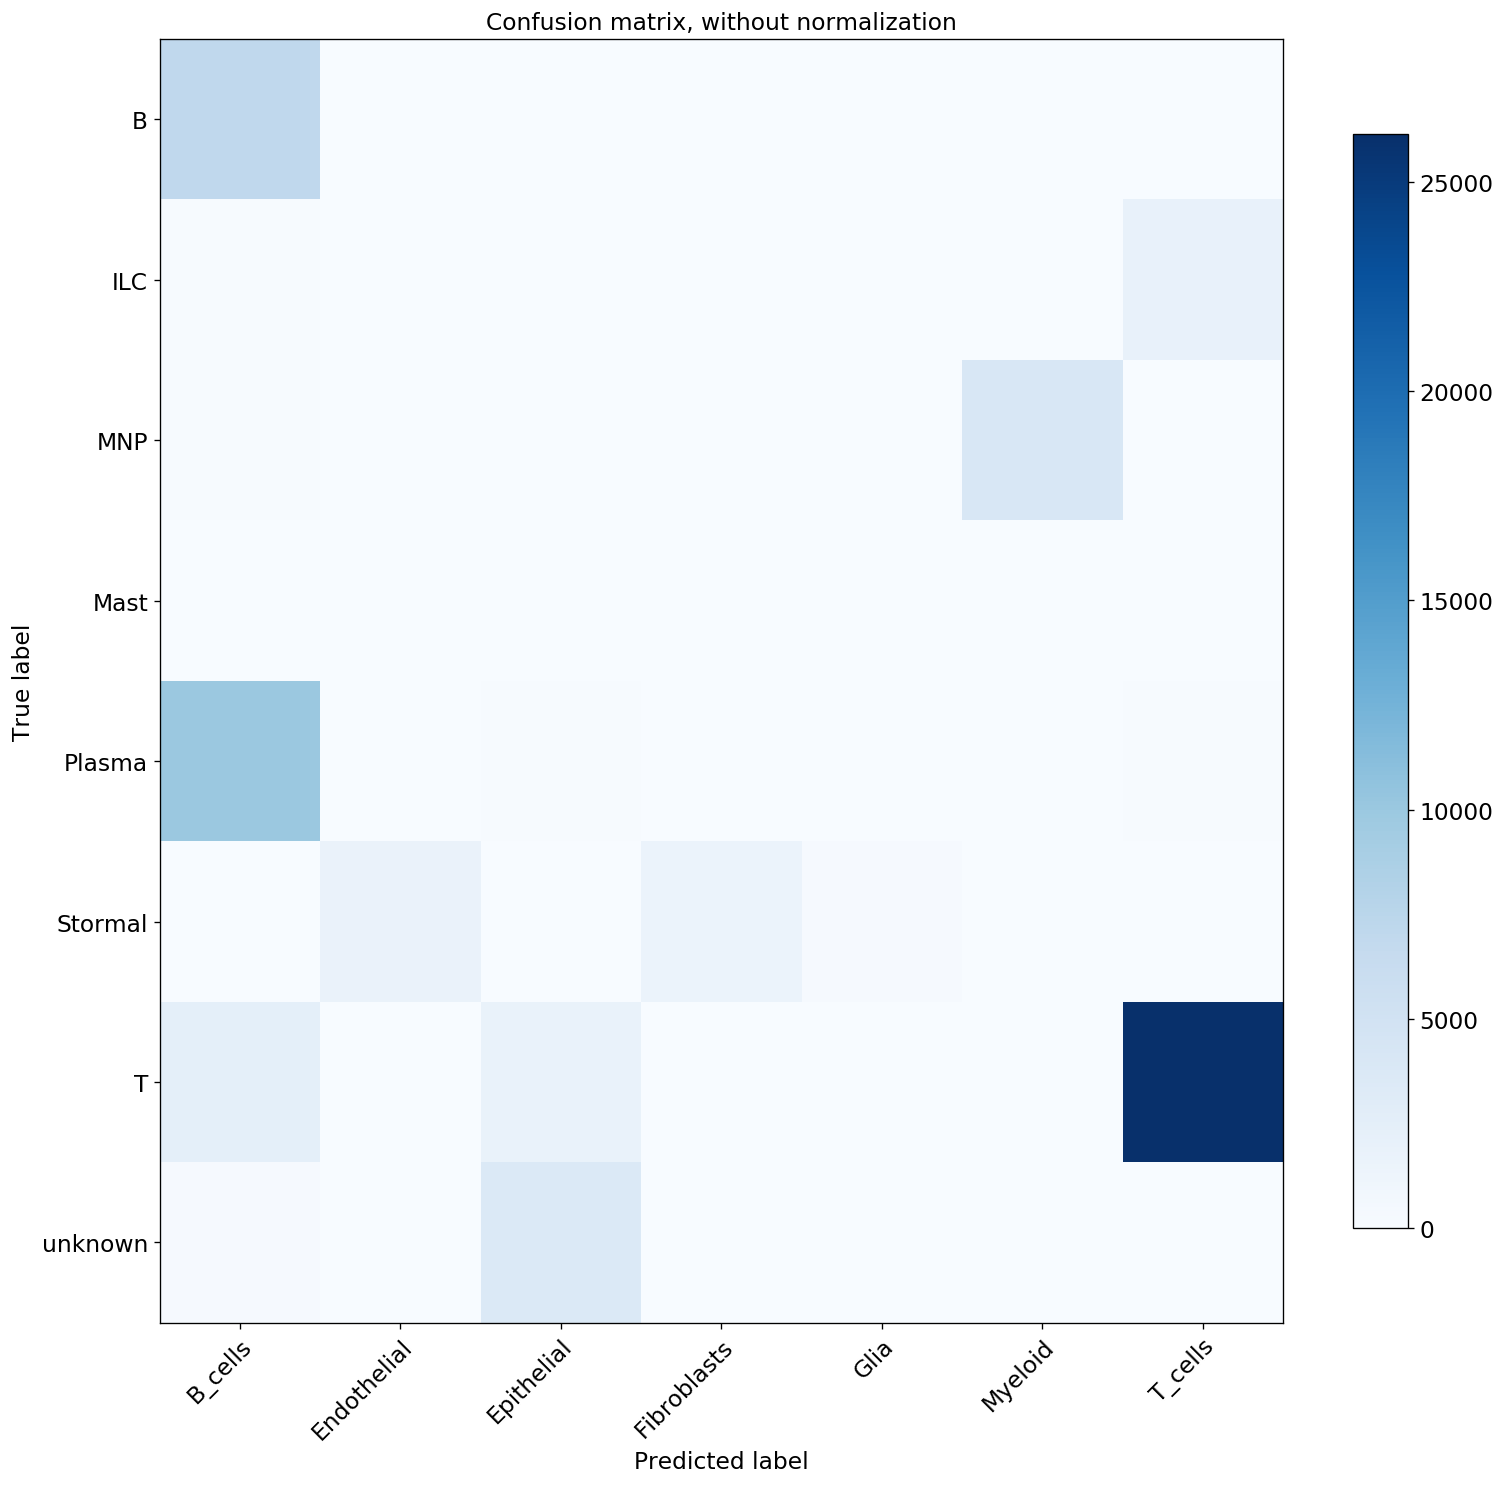

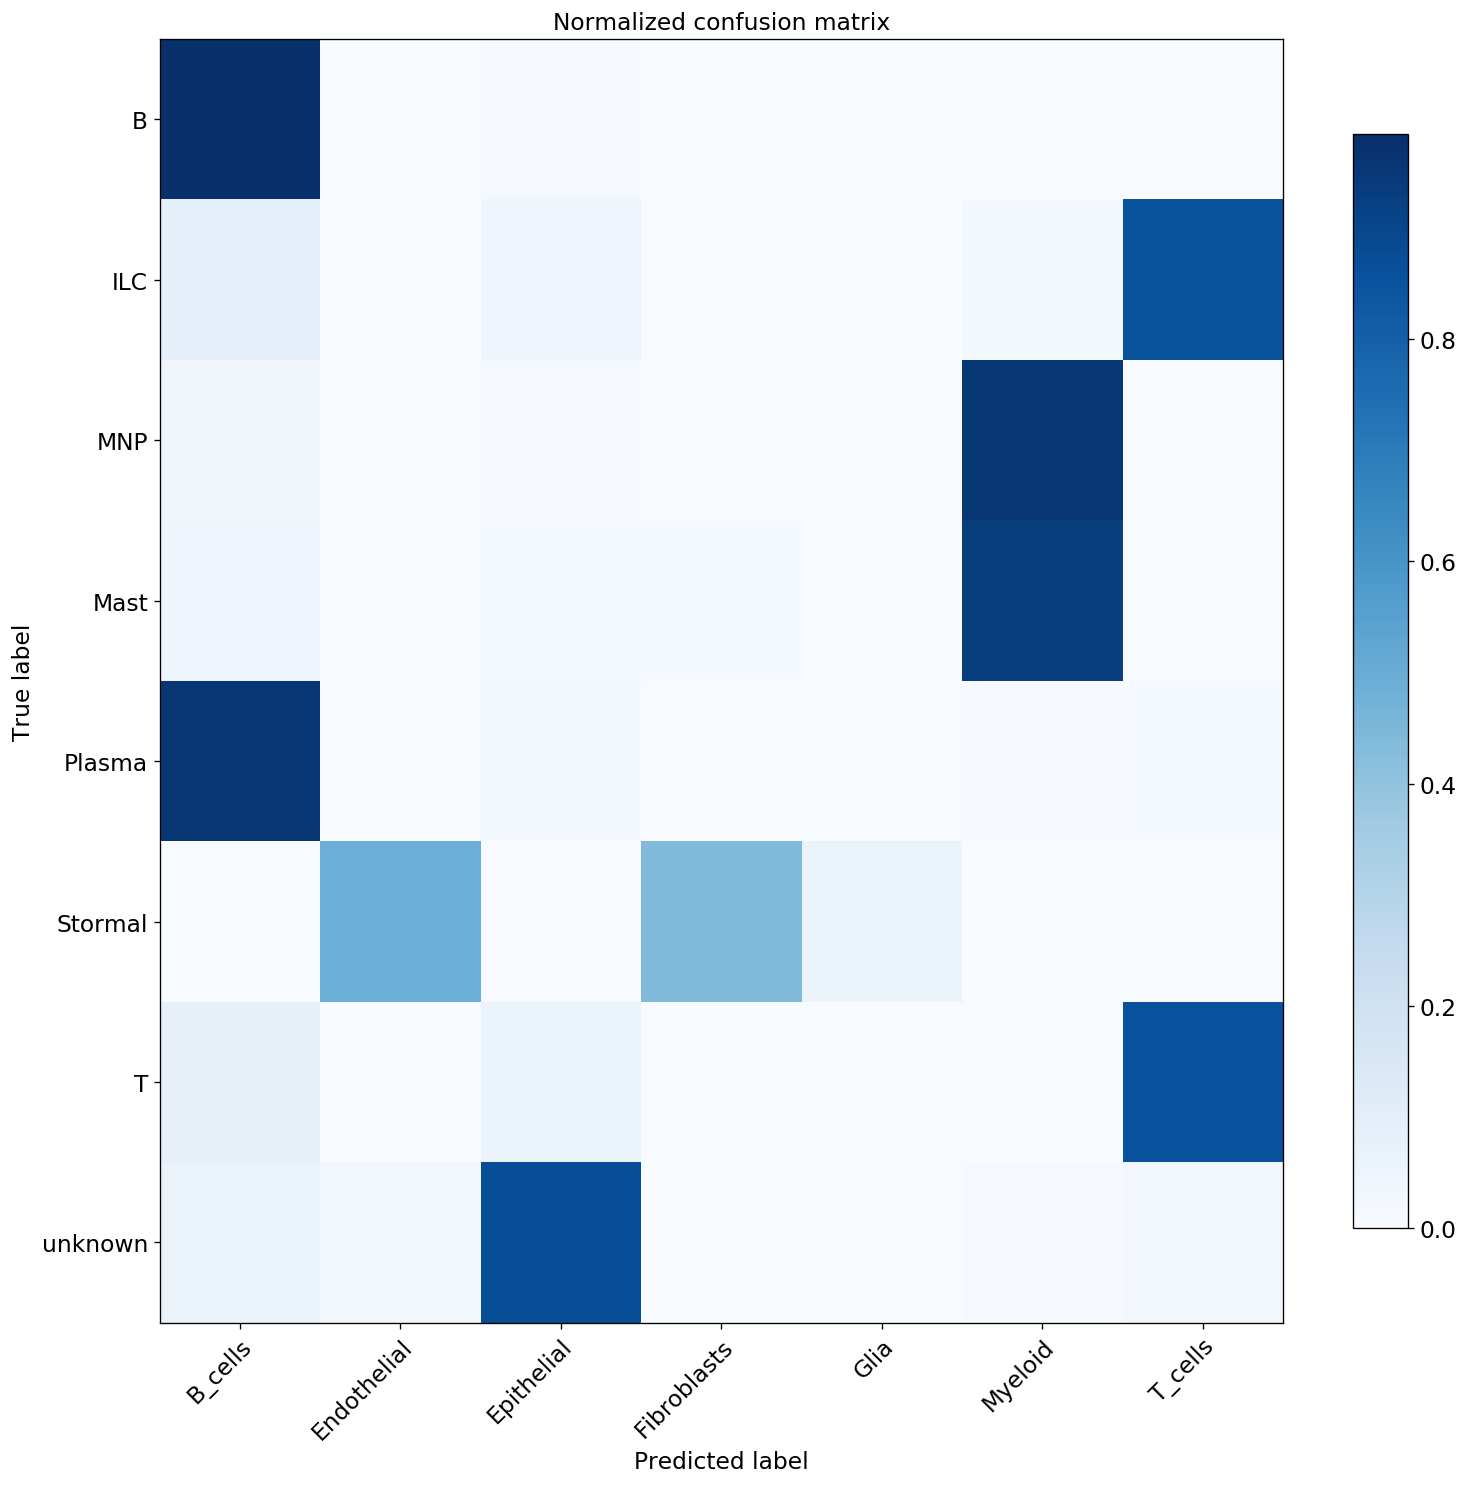

In [16]:
%matplotlib inline


bc.tl.auto_annot.report(adata_predicted, celltype, method, analysis_name, train_datasets, test_dataset, False, merge, use_raw, genes_to_use, clustering = 'leiden')

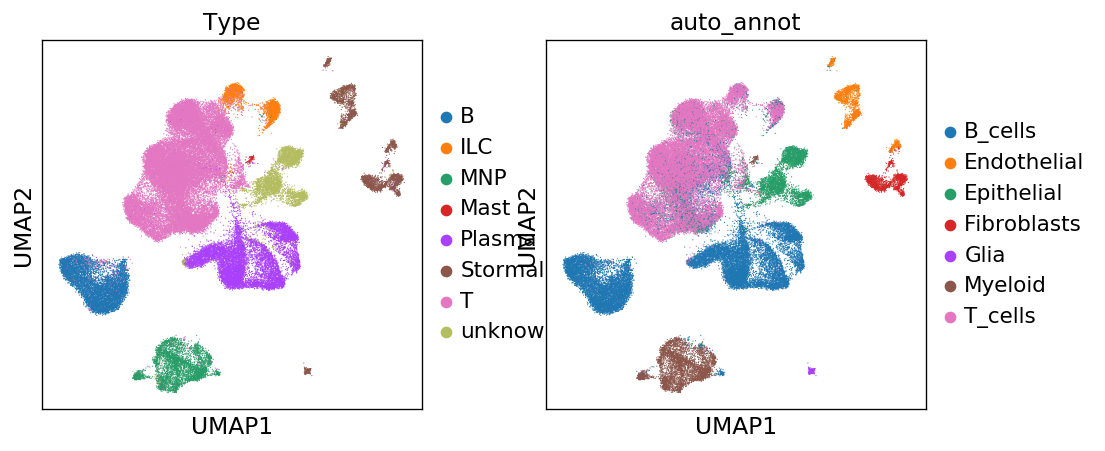

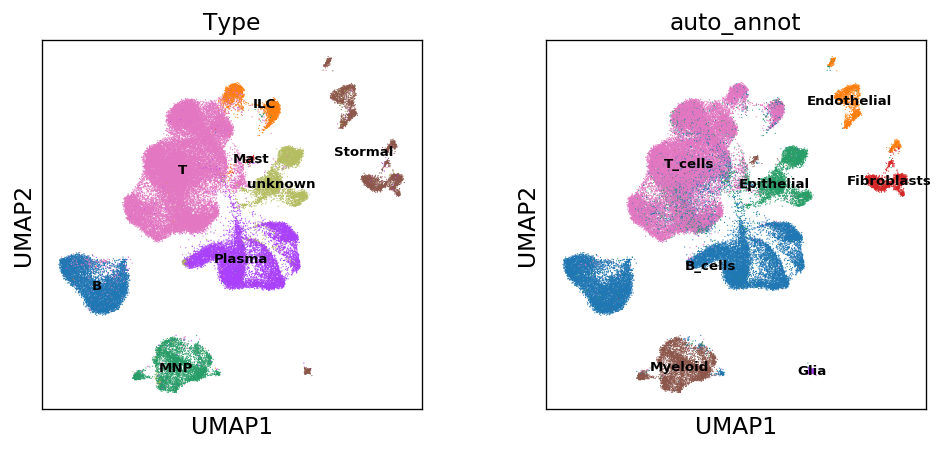

In [17]:
import scanpy as sc
sc.pl.umap(adata_predicted, color=[celltype, 'auto_annot'])
sc.pl.umap(adata_predicted, color=[celltype, 'auto_annot'], legend_loc='on data', legend_fontsize=8)

In [18]:
adata_train

View of AnnData object with n_obs × n_vars = 149732 × 1054 
    obs: 'CELL', 'Cluster', 'Health', 'Location', 'Subject', 'celltype_highlevel', 'nGene', 'nUMI', 'original_name', 'percent_mito', 'n_counts', 'n_genes', 'batch', 'leiden', 'dblabel', 'celltype', 'cluster_celltype', 'Type'
    var: 'ENSEMBL-0', 'SYMBOL', 'n_cells-0', 'total_counts-0', 'frac_reads-0', 'ENSEMBL-1', 'n_cells-1', 'total_counts-1', 'frac_reads-1'